In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from spectral_clustering import *
from stability_analysis import *
from parameter_fitting import *
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [3]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [4]:
random_state = 1

In [5]:
parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 8, 10, 15, 20, 30, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

In [6]:
parameter_grid_mutual_knn = {
    "sim_graph_type": ["mutual_knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [5, 8, 10, 15, 20, 30, 40],
    "epsilon": [0],
}

In [7]:
parameter_grid_eps_neighborhood = {
    "sim_graph_type": ["eps_neighbor"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.5,
        0.75,
        1.0,
        1.25,
        1.5,
        2.0,
        4.0,
        8.0,
    ],
}

In [8]:
parameter_grid_fully_connected = {
    "sim_graph_type": ["fully_connect"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1.0, 2.0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [0],
}

# Different Density Regions

We  start with a dataset that has 3 clusters with different densities. 

In [9]:
blobs_data, blobs_labels = make_blobs(
    n_samples=[500, 50, 50],
    centers=[[0, 0], [5, 5], [5, -5]],
    cluster_std=[2.5, 0.3, 0.3],
    random_state=random_state,
)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [10]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  -2.0702330720174427e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.016216045121575973
Average eigenvalue:  4.006667686452249e-05
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.025417386297576124
Average eigenvalue:  6.346562753176988e-05
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.04134531012818978
Average eigenvalue:  0.00014236257004738008
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': '

In [11]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  -2.0702330720174427e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.016216045121575973
Average eigenvalue:  4.006667686452249e-05
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.025417386297576124
Average eigenvalue:  6.346562753176988e-05
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.04134531012818978
Average eigenvalue:  0.00014236257004738008
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': '

c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:381: RuntimeWarning: divide by zero encountered in log
  vals = np.log(np.abs(eigs[:k]))


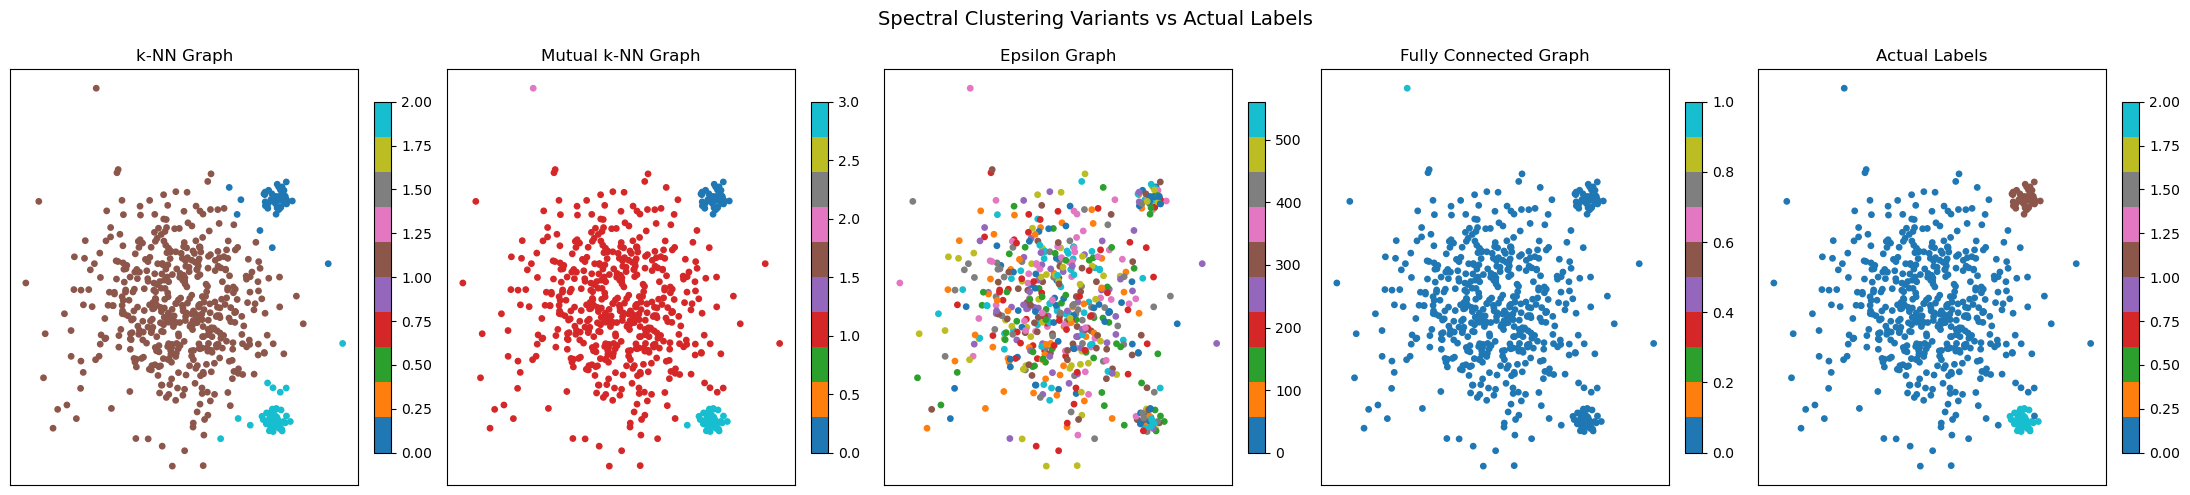

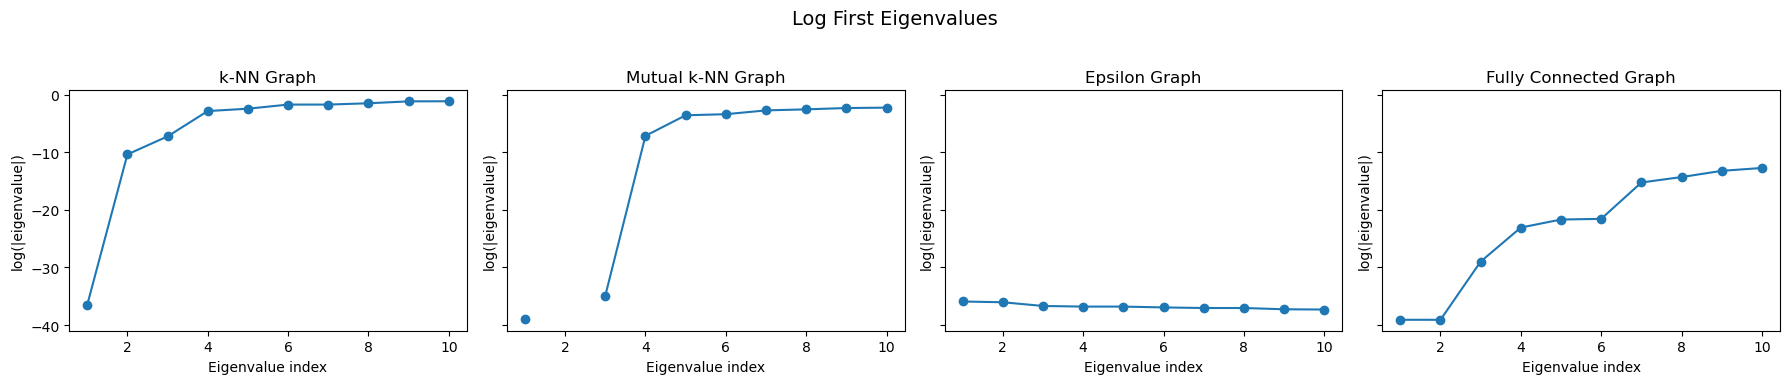

In [12]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=best_params_eps_neighborhood["K"],
    random_state=random_state,
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=best_params_fully_connected["K"],
    random_state=random_state,
)

plots = [
    ("k-NN Graph", res_knn.clustering_model.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.clustering_model.labels_),
    ("Epsilon Graph", res_eps_neighborhood.clustering_model.labels_),
    ("Fully Connected Graph", res_fully_connected.clustering_model.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    res_knn.eigenvalues,
    res_mutual_knn.eigenvalues,
    res_eps_neighborhood.eigenvalues,
    res_fully_connected.eigenvalues,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

So, as expected, epsilon neighborhood and RBF kernel similarities perform badly, because we have different density regions and also the less dense one is overlapping with the denser regions, so no global density related parameter ($\epsilon$ / $\sigma$) delivers a good result. Mutual KNN suggests 4 clusters, one of which is a single point and an outlier (top left corner)

# Same Density, Close Clusters

In [17]:
blobs_data, blobs_labels = make_blobs(
    n_samples=500, centers=3, cluster_std=0.8, random_state=random_state
)

# Apply a transformation to make the blobs anisotropic (elongated)
transformation = [[1.8, 1.5], [1.5, 0.5]]
blobs_data = np.dot(blobs_data, transformation)

distance_matrix = get_distance_matrix_from_data(blobs_data)

We use the same parameter grid

In [18]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  1.1499503258612005e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.020058926817085362
Average eigenvalue:  0.00015079758808651374
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 3, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_

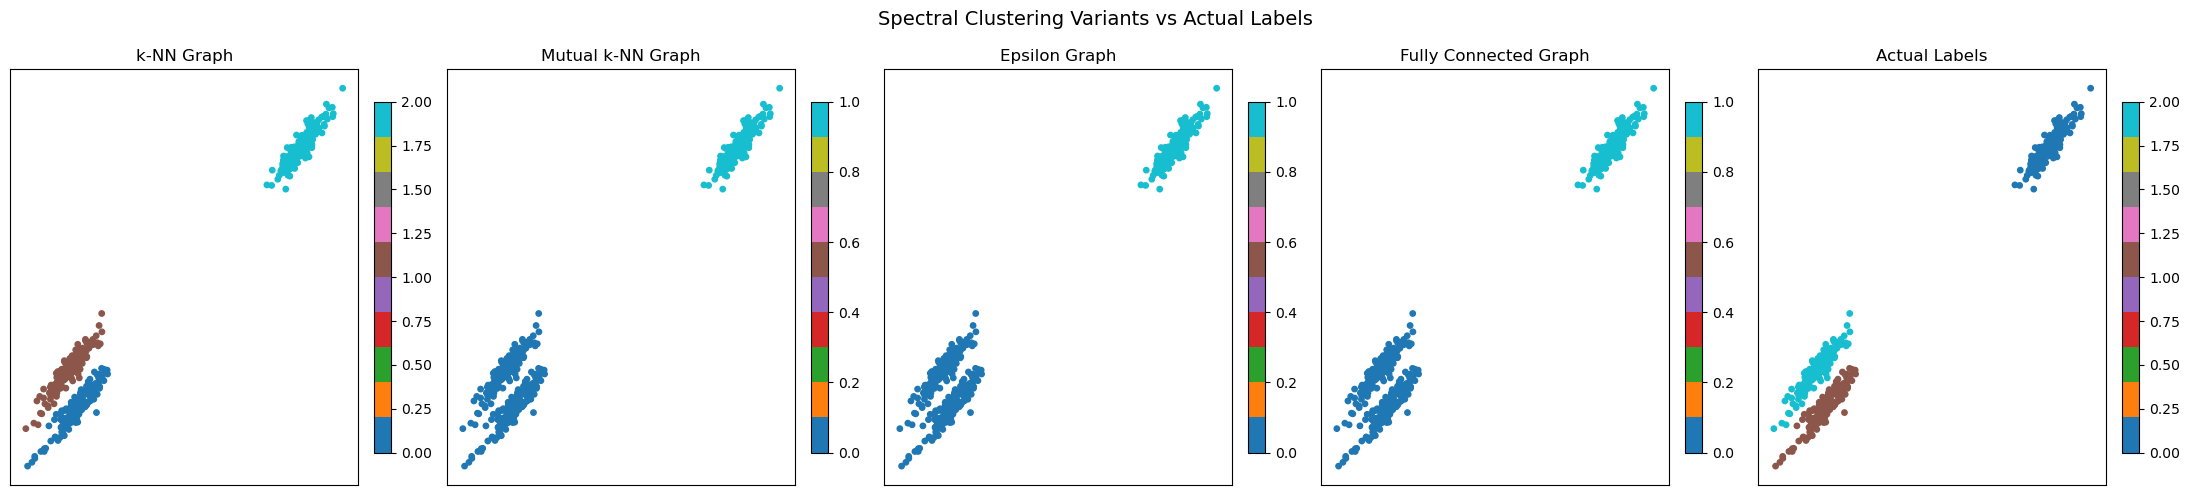

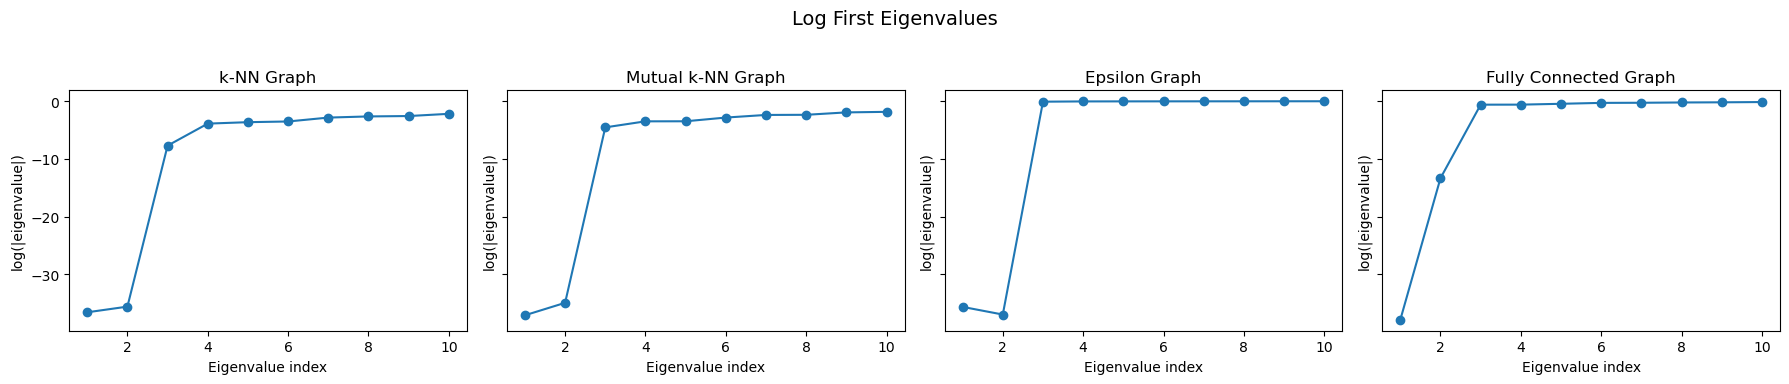

In [19]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=best_params_eps_neighborhood["K"],
    random_state=random_state,
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=best_params_fully_connected["K"],
    random_state=random_state,
)

plots = [
    ("k-NN Graph", res_knn.clustering_model.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.clustering_model.labels_),
    ("Epsilon Graph", res_eps_neighborhood.clustering_model.labels_),
    ("Fully Connected Graph", res_fully_connected.clustering_model.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    res_knn.eigenvalues,
    res_mutual_knn.eigenvalues,
    res_eps_neighborhood.eigenvalues,
    res_fully_connected.eigenvalues,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

KNN similarity was lucky and got 3 clusters as the optimal value, even though the plot suggests that 2 might be more suitable. However, if we explicitly set that we want 3 clusters, mutual KNN performs well as well, as we can see below. Epsilon neighborhood and RBF similarities are bad once again due to the fact that 2 clusters are very close to each other and the two struggle to distinguish them

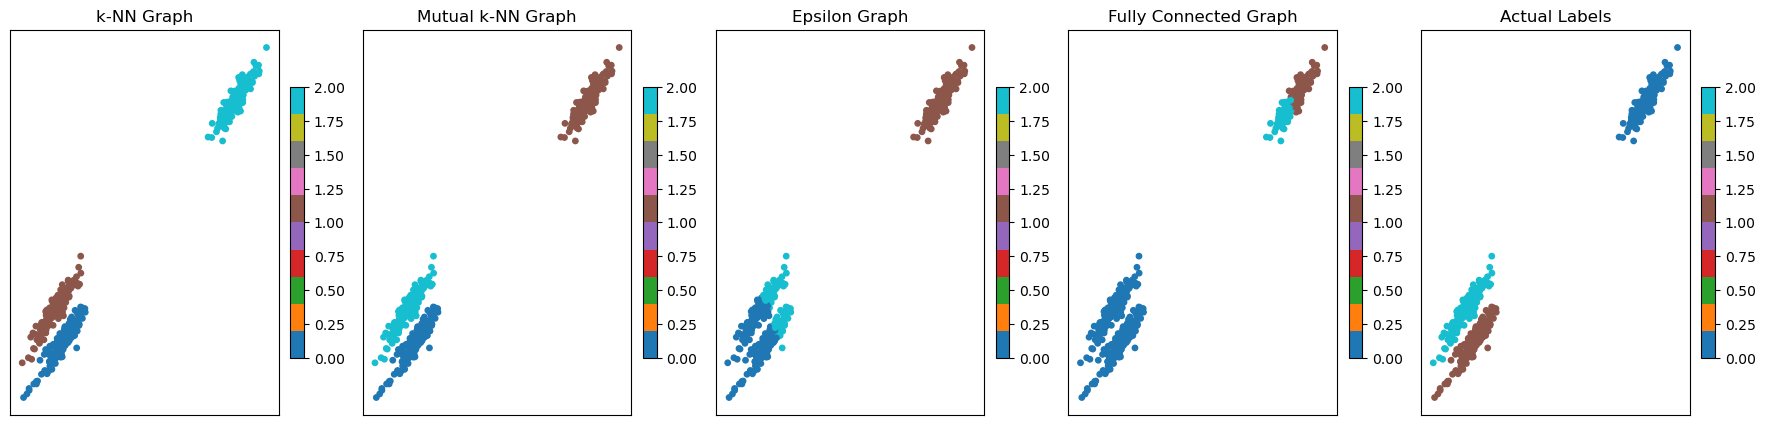

In [20]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=3,
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=3,
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=3,
    random_state=random_state,
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=3,
    random_state=random_state,
)

plots = [
    ("k-NN Graph", res_knn.clustering_model.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.clustering_model.labels_),
    ("Epsilon Graph", res_eps_neighborhood.clustering_model.labels_),
    ("Fully Connected Graph", res_fully_connected.clustering_model.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

In [27]:
spectral_embedding = res_knn.eigenvectors
true_labels = blobs_labels

plot_3d_spectral_embedding(spectral_embedding, blobs_labels)

In [26]:
import plotly.express as px

plots = [
    ("k-NN Graph", res_knn.eigenvectors),
    ("Mutual k-NN Graph", res_mutual_knn.eigenvectors),
    ("Epsilon Graph", res_eps_neighborhood.eigenvectors),
    ("Fully Connected Graph", res_fully_connected.eigenvectors),
]

for title, spectral_embedding in plots:
    fig = px.scatter_3d(
        x=spectral_embedding[:, 0],
        y=spectral_embedding[:, 1],
        z=spectral_embedding[:, 2],
        color=blobs_labels.astype(str),  # color by true labels
        title=f"{title} – Spectral Embedding (First 3 Eigenvectors)",
    )
    fig.update_traces(marker=dict(size=3))
    fig.show()

The number of clusters, in the end, might not be equal to what the eigengap suggests. It is just a heuristic

# Two Moons

In [17]:
moons_data, moons_labels = make_moons(n_samples=500, noise=0.05)

distance_matrix = get_distance_matrix_from_data(moons_data)

In [18]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  -4.50275857782401e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 2, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 5, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0
Average eig

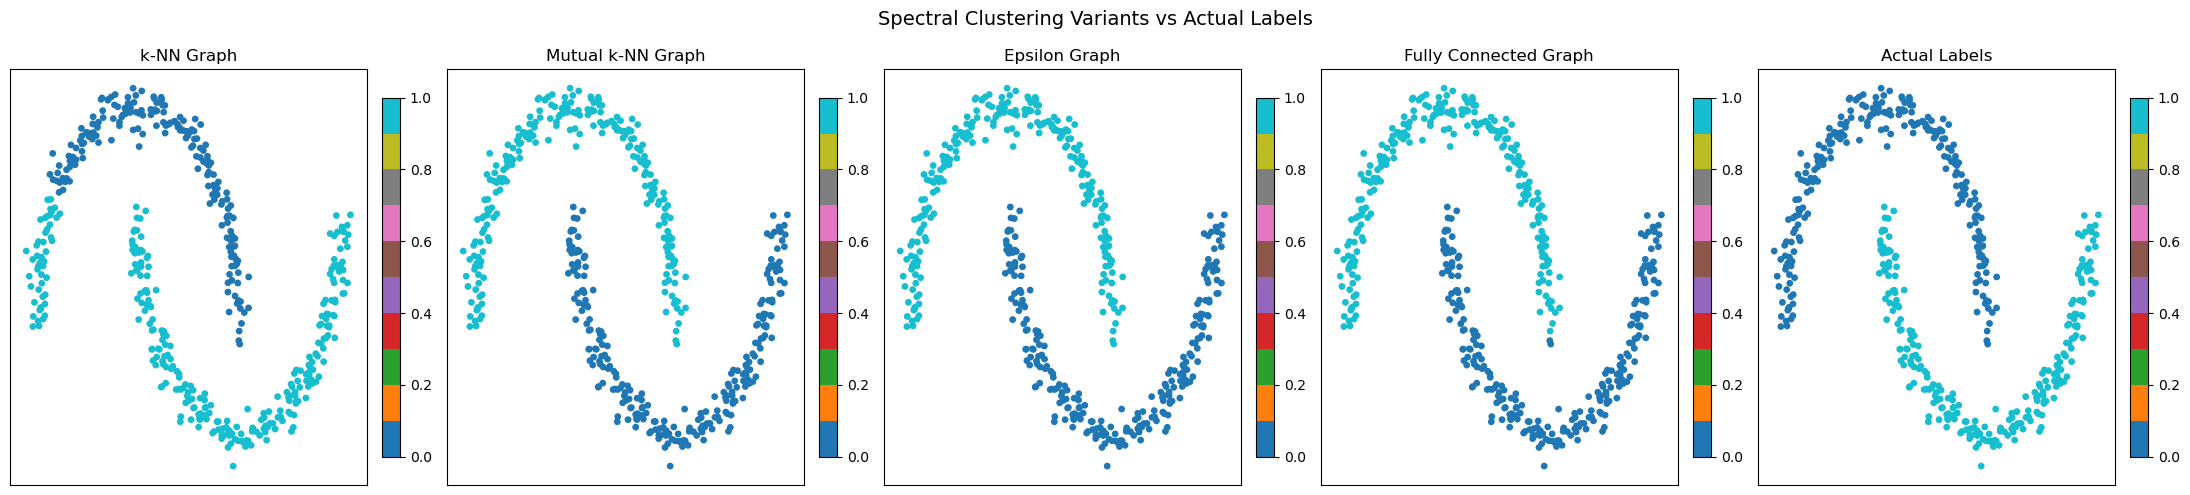

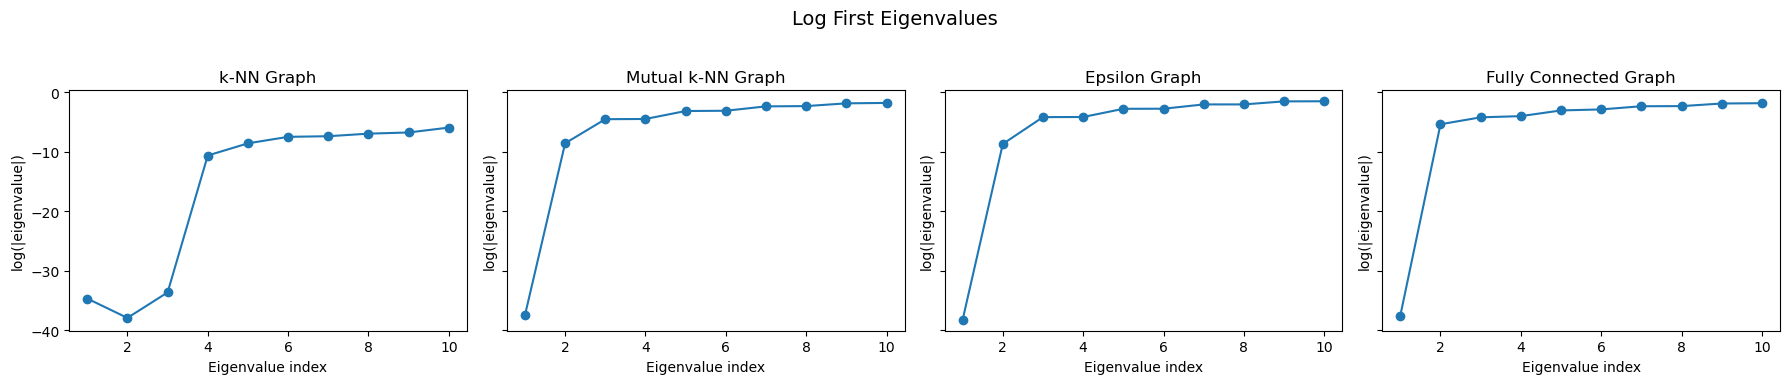

In [19]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=best_params_eps_neighborhood["K"],
    random_state=random_state,
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=best_params_fully_connected["K"],
    random_state=random_state,
)

plots = [
    ("k-NN Graph", res_knn.clustering_model.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.clustering_model.labels_),
    ("Epsilon Graph", res_eps_neighborhood.clustering_model.labels_),
    ("Fully Connected Graph", res_fully_connected.clustering_model.labels_),
    ("Actual Labels", moons_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        moons_data[:, 0],
        moons_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    res_knn.eigenvalues,
    res_mutual_knn.eigenvalues,
    res_eps_neighborhood.eigenvalues,
    res_fully_connected.eigenvalues,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

The parameters we have found seem to be pretty good for the knn case. However, they are pretty bad for the other two.

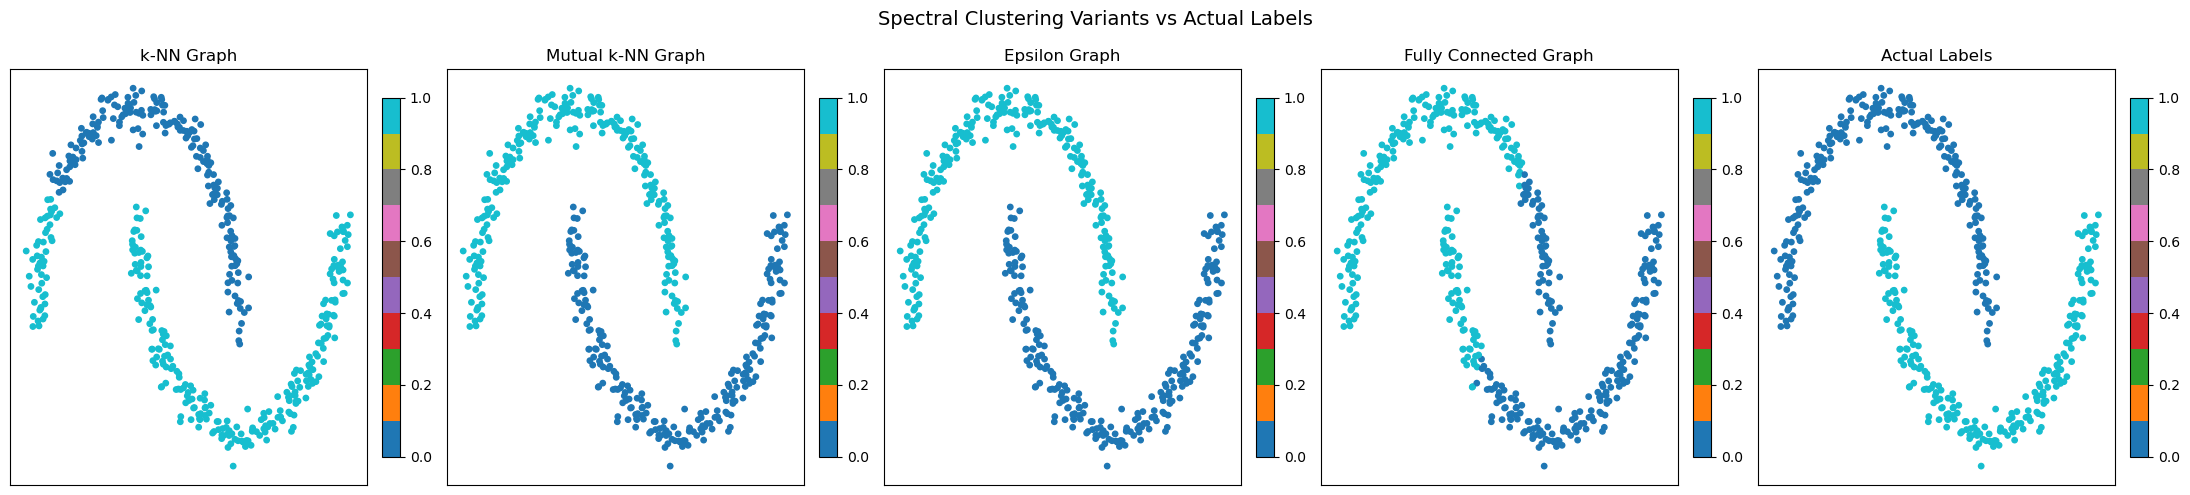

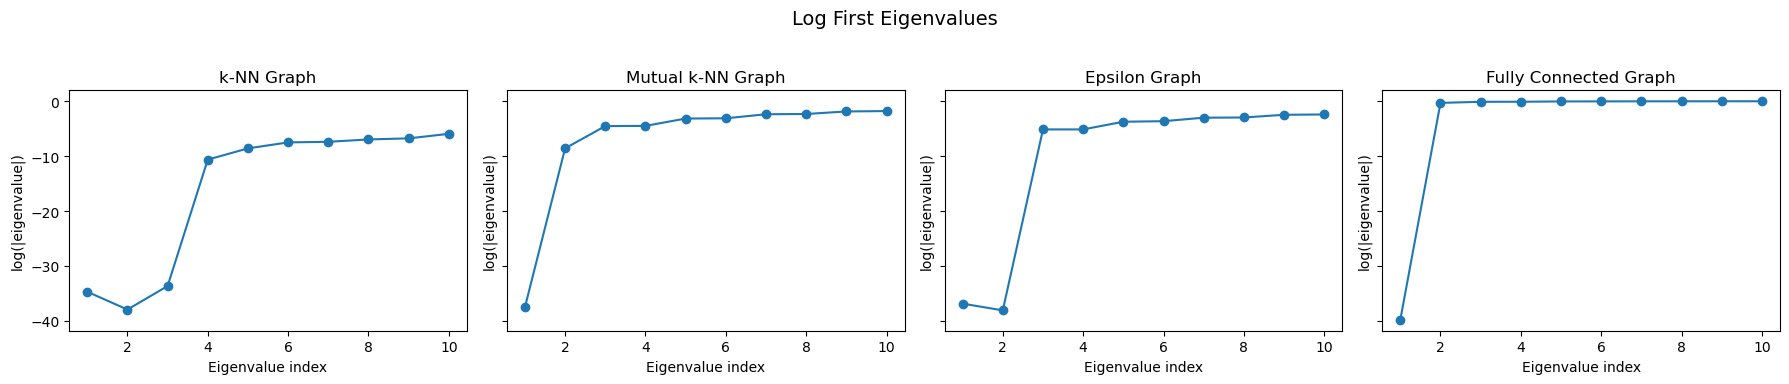

In [21]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=2,
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=2,
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=0.2,
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=2,
    random_state=random_state,
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=1,
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=2,
    random_state=random_state,
)

plots = [
    ("k-NN Graph", res_knn.clustering_model.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.clustering_model.labels_),
    ("Epsilon Graph", res_eps_neighborhood.clustering_model.labels_),
    ("Fully Connected Graph", res_fully_connected.clustering_model.labels_),
    ("Actual Labels", moons_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        moons_data[:, 0],
        moons_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    res_knn.eigenvalues,
    res_mutual_knn.eigenvalues,
    res_eps_neighborhood.eigenvalues,
    res_fully_connected.eigenvalues,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

We can make eps neighborhood perform well, but the RBF similarity doesn't work for this kind of data